In [11]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [2]:
data = pd.read_csv('UCI_Credit_Card.csv')

# Exploratory Data Analysis (EDA)

In [4]:
print("Dataset shape:", data.shape)

Dataset shape: (30000, 25)


In [5]:
print("\nData types:")
print(data.dtypes)


Data types:
ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object


In [6]:
print("\nFirst few rows:")
print(data.head())


First few rows:
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0      

In [7]:
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9

In [8]:
# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64


In [9]:
# Examine the target variable distribution
print("\nDefault payment distribution:")
print(data['default.payment.next.month'].value_counts(normalize=True))


Default payment distribution:
default.payment.next.month
0    0.7788
1    0.2212
Name: proportion, dtype: float64


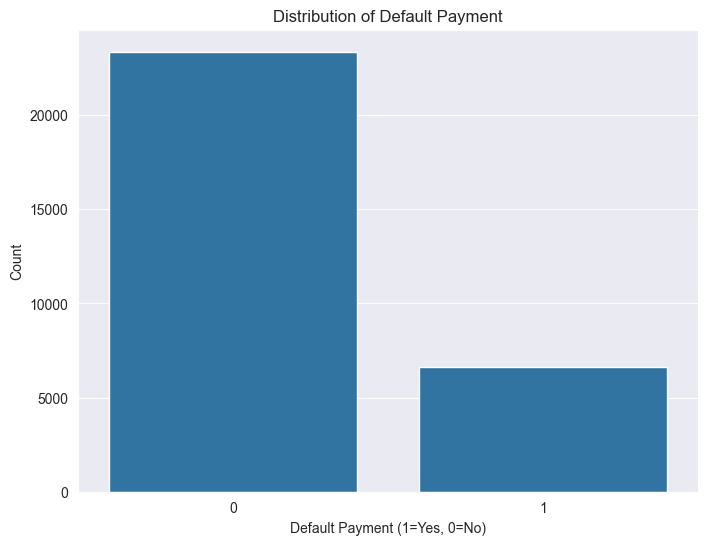

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='default.payment.next.month', data=data)
plt.title('Distribution of Default Payment')
plt.xlabel('Default Payment (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()

# Data Preprocessing

In [14]:
data = data.rename(columns={'default.payment.next.month': 'DEFAULT'})

In [15]:
X = data.drop(['ID', 'DEFAULT'], axis=1)
y = data['DEFAULT']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement CART Decision Tree

In [18]:
cart_model = DecisionTreeClassifier(random_state=42)
cart_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [19]:
y_pred = cart_model.predict(X_test_scaled)

In [20]:
print("\nBasic CART Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Basic CART Model Performance:
Accuracy: 0.726

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      7040
           1       0.38      0.42      0.40      1960

    accuracy                           0.73      9000
   macro avg       0.61      0.62      0.61      9000
weighted avg       0.74      0.73      0.73      9000



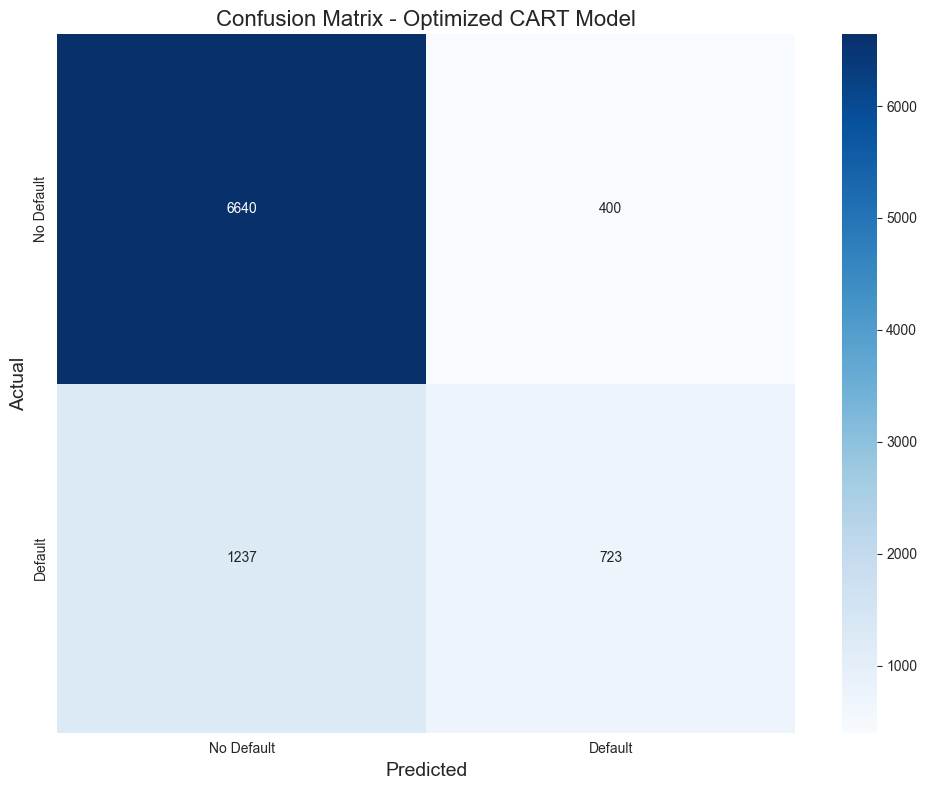

In [36]:
conf_matrix_best = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix - Optimized CART Model', fontsize=16)
plt.tight_layout()
plt.show()

In [22]:
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [23]:
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

In [24]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [25]:
print("\nBest parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation score: 0.8192380952380951


In [26]:
best_cart_model = grid_search.best_estimator_

In [27]:
y_pred_best = best_cart_model.predict(X_test_scaled)

In [28]:
print("\nOptimized CART Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))


Optimized CART Model Performance:
Accuracy: 0.8181111111111111

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.64      0.37      0.47      1960

    accuracy                           0.82      9000
   macro avg       0.74      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



# Feature Importance

In [29]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_cart_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

C:\Users\MANAV\AppData\Local\Temp\ipykernel_21300\1543181700.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance[:15], palette='viridis')


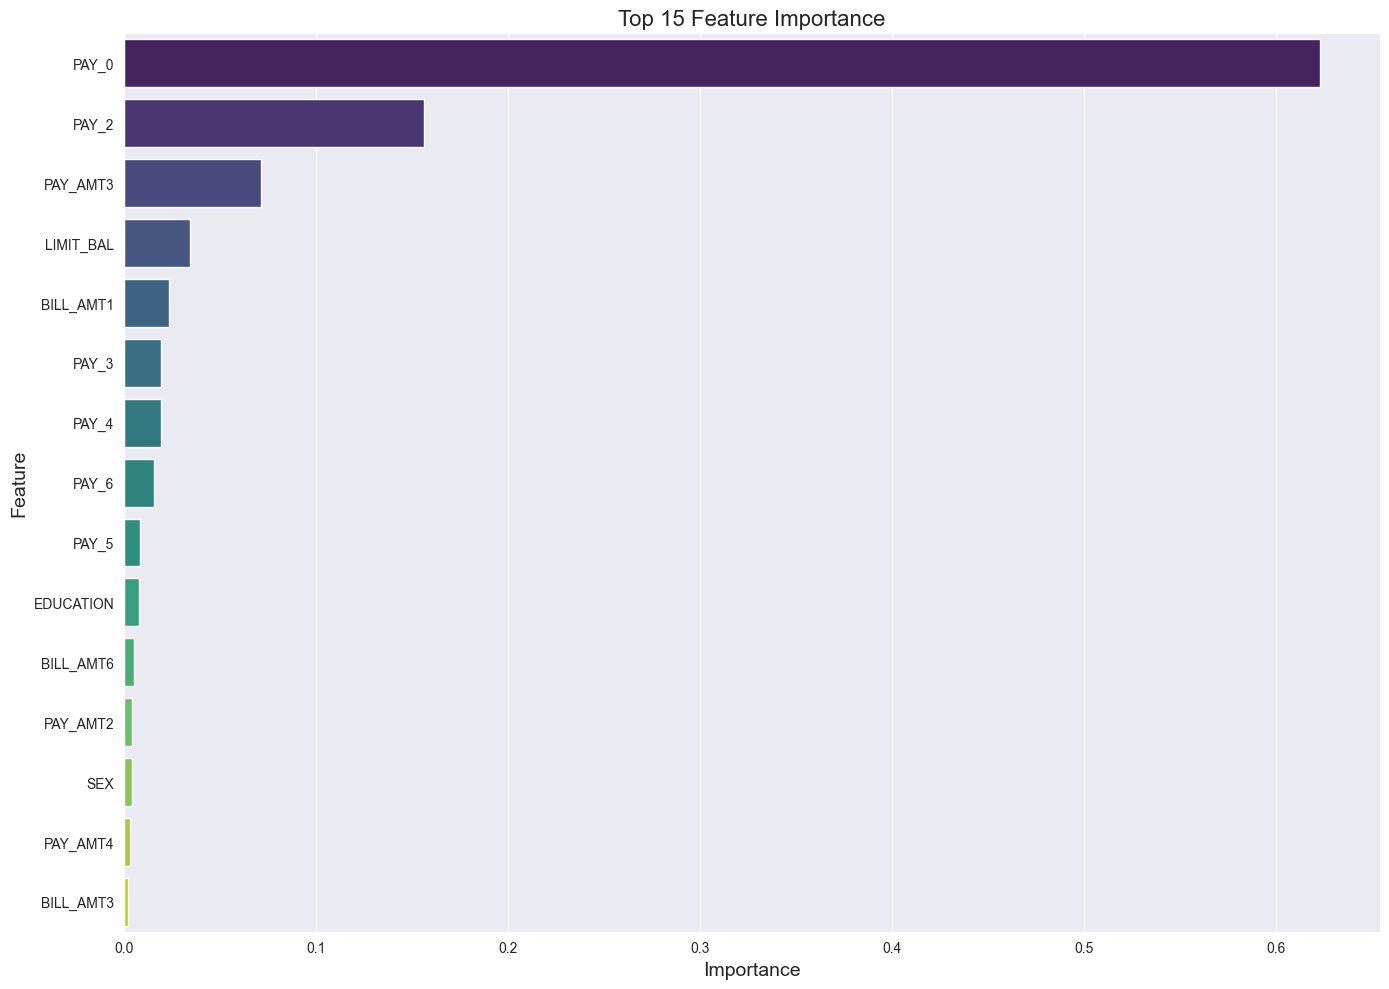

In [37]:
plt.figure(figsize=(14, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance[:15], palette='viridis')
plt.title('Top 15 Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()

# Visualize the Decision Tree (limit depth for readability)

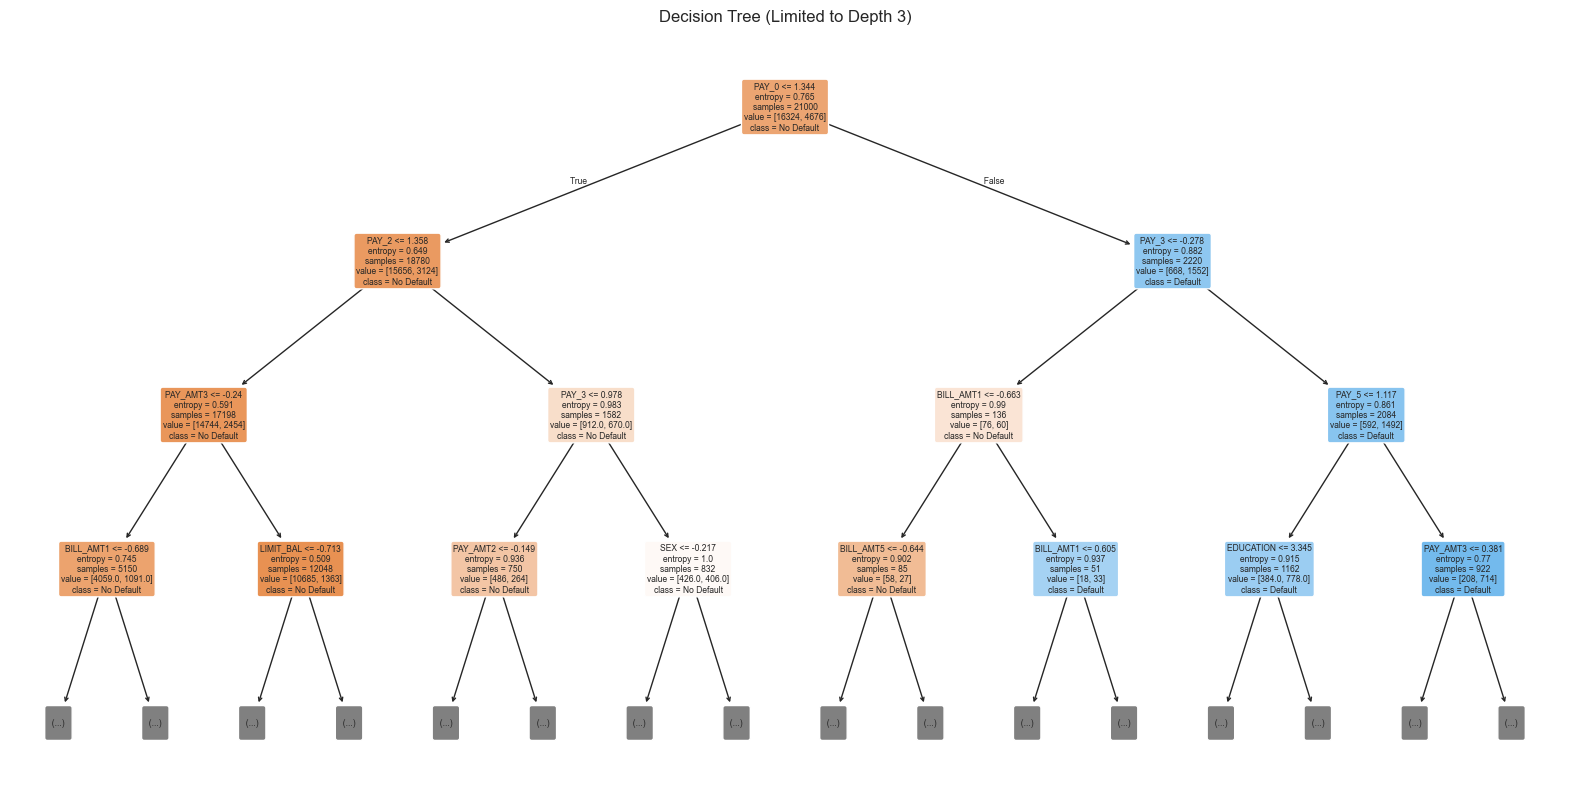

In [32]:
plt.figure(figsize=(20, 10))
plot_tree(best_cart_model, max_depth=3, feature_names=X.columns,
          class_names=['No Default', 'Default'], filled=True, rounded=True)
plt.title('Decision Tree (Limited to Depth 3)')
plt.savefig('decision_tree.png')
plt.show()

In [38]:
# ROC Curve
y_prob = best_cart_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

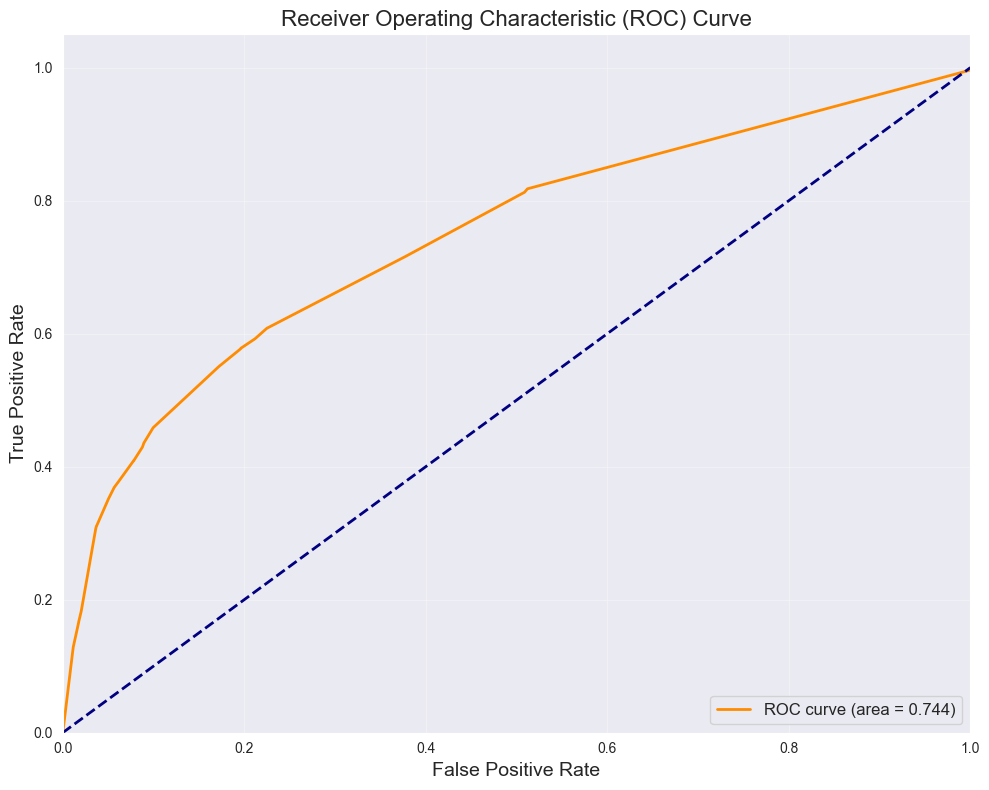

In [39]:
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Model Interpretation - Sample Prediction Path

In [40]:
sample_index = 0
sample_instance = X_test_scaled[sample_index].reshape(1, -1)
sample_prediction = best_cart_model.predict(sample_instance)[0]
sample_actual = y_test.iloc[sample_index]

In [41]:
print(f"Sample prediction: {'Default' if sample_prediction == 1 else 'No Default'}")
print(f"Actual value: {'Default' if sample_actual == 1 else 'No Default'}")

Sample prediction: No Default
Actual value: No Default


In [42]:
# Get the decision path
node_indicator = best_cart_model.decision_path(sample_instance)
leaf_id = best_cart_model.apply(sample_instance)

In [43]:
# Extract the path from root to leaf
node_index = node_indicator.indices[node_indicator.indptr[0]:node_indicator.indptr[1]]

In [44]:
# Print the decision path
for i, node_id in enumerate(node_index):
    if i == len(node_index) - 1:  # Leaf node
        continue

    if (sample_instance[0, best_cart_model.tree_.feature[node_id]] <=
            best_cart_model.tree_.threshold[node_id]):
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print(f"Decision {i}: {X.columns[best_cart_model.tree_.feature[node_id]]} {threshold_sign} "
          f"{best_cart_model.tree_.threshold[node_id]:.2f}")

Decision 0: PAY_0 <= 1.34
Decision 1: PAY_2 <= 1.36
Decision 2: PAY_AMT3 > -0.24
Decision 3: LIMIT_BAL <= -0.71
Decision 4: PAY_4 <= 1.04


# Class Distribution in Training vs Testing

C:\Users\MANAV\AppData\Local\Temp\ipykernel_21300\3277906812.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_dist.index, y=train_dist.values, palette='viridis')
C:\Users\MANAV\AppData\Local\Temp\ipykernel_21300\3277906812.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=test_dist.index, y=test_dist.values, palette='viridis')


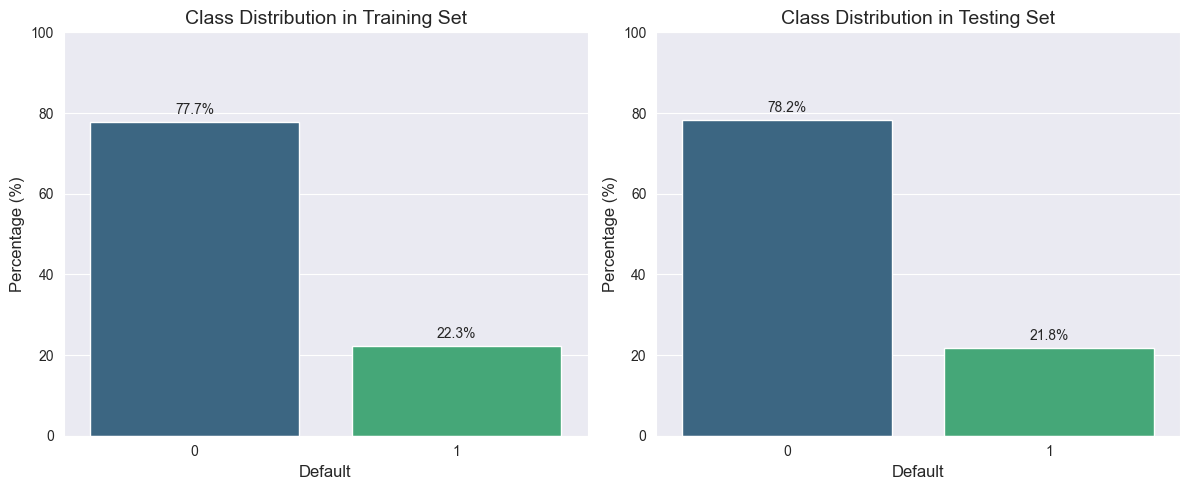

In [46]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
train_dist = pd.Series(y_train).value_counts(normalize=True) * 100
sns.barplot(x=train_dist.index, y=train_dist.values, palette='viridis')
plt.title('Class Distribution in Training Set', fontsize=14)
plt.xlabel('Default', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.ylim(0, 100)
for i, v in enumerate(train_dist.values):
    plt.text(i, v + 2, f"{v:.1f}%", ha='center')

plt.subplot(1, 2, 2)
test_dist = pd.Series(y_test).value_counts(normalize=True) * 100
sns.barplot(x=test_dist.index, y=test_dist.values, palette='viridis')
plt.title('Class Distribution in Testing Set', fontsize=14)
plt.xlabel('Default', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.ylim(0, 100)
for i, v in enumerate(test_dist.values):
    plt.text(i, v + 2, f"{v:.1f}%", ha='center')

plt.tight_layout()
plt.show()